In [ ]:
import pandas as pd
nba = pd.read_csv("nba_all_elo.csv")
type(nba)

In [ ]:
print(len(nba)) # number of rows
print(nba.shape) # dimension sizes
nba.head()

In [ ]:
# display options
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)
nba.tail()

In [ ]:
# initial glimpse (type-checking, memory usage, count, null values) 
# (Try to not leave things out as Dtype being object)
nba.info()

In [ ]:
# initial glimpse (numeric summary)
nba.describe()

In [ ]:
# initial glimpse (non-numeric summary)
nba.describe(include="object")

In [ ]:
# value counts

# Number of games each team played
nba["team_id"].value_counts()

# Dates which BOS (team with most games played) played
print("Oldest, Latest Date which Boston played a game:\n", "-" * 48 + "\n",
      nba.loc[nba["team_id"] == "BOS", "date_game"].agg(("min", "max")), sep="")
# Teams Boston has played against
print("\n# of times Boston has played against each of their opponent teams\n", "-" * 65 + "\n",
      nba.loc[nba["team_id"] == "BOS", "opp_id"].value_counts(), sep="")


In [ ]:
# Do a search for Baltimore games where both teams scored over 100 points. 
# In order to see each game only once, you’ll need to exclude duplicates:
blb_special_games = nba[
    (nba["team_id"] == "BLB") & 
    (nba["pts"] > 100) &
    (nba["opp_pts"] > 100)
    ]
blb_special_games.loc[:, ("game_id", "_iscopy", "team_id", "pts", "opp_id", "opp_pts")]

In [ ]:
games = nba.pivot_table(index="team_id", values="game_id", aggfunc="count").reset_index()
games = games.rename(columns = dict(game_id="games played")).set_index("team_id")
games.head()

In [ ]:
wins = nba[nba["game_result"] == "W"].pivot_table(
    index="team_id", values="game_id", aggfunc="count").reset_index()
wins = wins.rename(columns = dict(game_id="games won")).set_index("team_id")
wins.head()

In [ ]:
losses = nba[nba["game_result"] == "L"].pivot_table(
    index="team_id", values="game_id", aggfunc="count").reset_index()
losses = losses.rename(columns = dict(game_id="games lost")).set_index("team_id")
losses.head()


In [ ]:
win_loss = pd.merge(wins, losses, on="team_id")
win_loss = pd.merge(win_loss, games, on="team_id")
win_loss["win rate"] = win_loss["games won"] / win_loss["games played"]
win_loss = win_loss.sort_values(by = "games played", ascending=False)

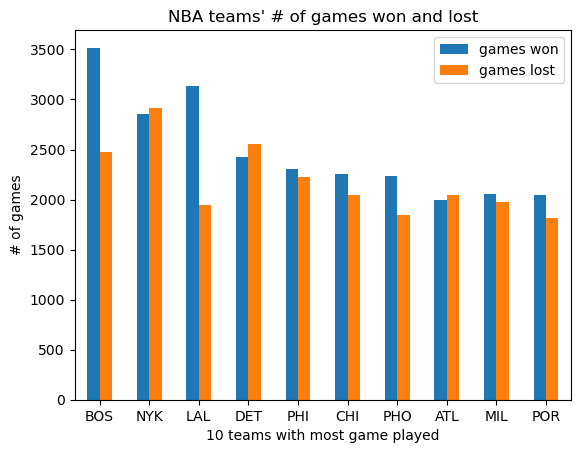

In [28]:
import matplotlib.pyplot as plt
win_loss[["games won", "games lost"]].head(10).plot(kind="bar", stacked=False)
plt.title("NBA teams' # of games won and lost")
plt.xlabel("10 teams with most game played")
plt.ylabel("# of games")
msg = plt.xticks(rotation=0)


In [27]:
nba.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.00,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.00,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.00,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.00,1279.62,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64,NaN
